# Dynex SDK - PennyLane Native Gate Circuit Example

First we import the required packages:

In [1]:
import dynex
from dynex import dynex_circuit
from pennylane import numpy as np
import pennylane as qml

We define our circuit:

In [2]:
params = [np.pi, np.pi] # [0.1, 0.2]
wires = 2

def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.state()

We draw the circuit:

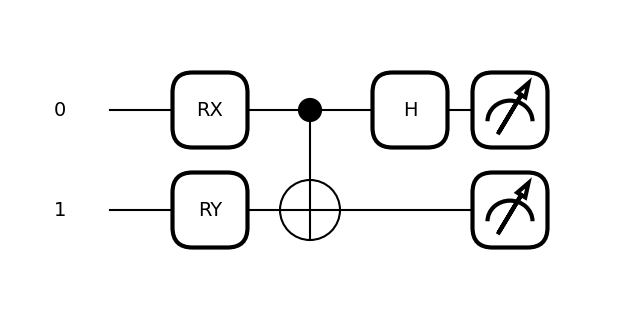

In [3]:
# draw circuit:
_ = qml.draw_mpl(circuit, style="black_white")(params)

We execute and measure the circuit on the Dynex platform:

In [5]:
# Execute the circuit on Dynex:
measure = dynex_circuit.execute(circuit, params, wires, mainnet=True, method='measure')
print('Mesaure:',measure)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CIRCUITS │   STEPS │   GROUND STATE │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼────────────────┼────────────┼─────────┼────────────────┤
│      29993 │       21 │              58 │        0.02 │      0.51 │              1 │       1000 │     256 │       36242.00 │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴────────────────┴────────────┴─────────┴────────────────╯
╭────────────┬─────────────────┬────────────┬───────┬──────────┬──────────────┬─────────────────────────────┬───────────┬──────────╮
│     WORKER │         VERSION │   CIRCUITS │   LOC │   ENERGY │      RUNTIME │                 LAST UPDATE │     STEPS │   STATUS │
├────────────┼─────────────────┼────────────┼───────┼──────────┼──────────────┼────────────────────